# Extraction of Feature from EEG Signal to Detect ADHD

###Faculty of Engineering of Univery of Porto 

###Master's in Data Science and Engineering

Fundamentals of Data Sciences - Signal Processing Module

December 2022

Group 5

- Barbara Zanetti Silva (202200595)
- Rendson Ribeiro Fernandes (202204390)
- Rojan Aslani (202204382)
- Farzam Salimi (201007922)
-	Diogo Cruz (202202464)


# **Table of Contents**

1.	[Introduction](#1)
2.	[Materials and Methods](#2)
3.	[Results and Discussion](#3)
4. [Conclusions and Future Works](#4)
5. [References](#5)


# Introduction 

Attention Deficit Hyperactivity Disorder (ADHD) is one of the most common neurodevelopmental disorders of childhood. It is usually first diagnosed in childhood and often lasts into adulthood. Children with ADHD may have trouble paying attention, controlling impulsive behaviors (may act without thinking about what the result will be), or be overly active. ADHD affects about 2.2% of the whole population in 2017. Specially, in Portugal, approximatly 1.5% of the population deals with tis disorder.

## ADHD Types & Diagnosis

There are three different types of ADHD, depending on the strongest symptoms of the patient:

**Predominantly Inattentive Presentation:** It is hard for the individual to organize or finish a task, to pay attention to details, or to follow instructions or conversations. The person is easily distracted or forgets details of daily routines.

**Predominantly Hyperactive-Impulsive Presentation:** The person fidgets and talks a lot. It is hard to sit still for long (e.g., for a meal or while doing homework). Smaller children may run, jump or climb constantly. The individual feels restless and has trouble with impulsivity. Someone who is impulsive may interrupt others a lot, grab things from people, or speak at inappropriate times. It is hard for the person to wait their turn or listen to directions. A person with impulsiveness may have more accidents and injuries than others.

**Combined Presentation:** Symptoms of the above two types are equally present in the person.

Deciding if a child has ADHD is a process with several steps. There is no single test to diagnose ADHD, and many other problems, like anxiety, depression, sleep problems, and certain types of learning disabilities, can have similar symptoms. One step of the process involves having a medical exam, including hearing and vision tests, to rule out other problems with symptoms like ADHD. Diagnosing ADHD usually includes a checklist for rating ADHD symptoms and taking a history of the child from parents, teachers, and sometimes, the child himself/herself.

The United States Food and Drug Administration (FDA) approved the use of electroencephalography (EEG) to diagnose ADHD in 2013. Neuropsychiatric EEG-Based Assessment Aid (NEBA) System is a noninvasive scan to measure slow brain waves (delta and theta waves) and fast brain waves (alpha and beta waves).

## EEG

An EEG is a tool that records brain activity and is used to find changes in brain activity which can lead to diagnosis of several brain disorders, including epilepsy, sleep disorders, brain tuomr, stroke, brain damage, etc. 

To record a surface EEG, a technician places small discs called electrodes on the scalp. They may use a special cap instead. The electrodes connect with wires to a device that amplifies brain waves and records them on a computer. EEG is a non-invasice, safe, and painless method of evaluation of brain activity. 

The conventional bandwidth of clinical EEG focuses on the analysis of waveforms ranging from 0.5 Hz to 70 Hz. We can divide this waves in alpha, beta, delta, theta and gama. They are splited into these frequency ranges:

1. **Delta (1 to 4 Hz)**: Delta rhythm is physiologically seen in deep sleep and is prominent in the frontocentral head regions. Pathological delta rhythm presents in awake states in case of generalized encephalopathy and focal cerebral dysfunction. Temporal intermittent rhythmic delta activity (TIRDA) is frequently seen in individuals who have temporal lobe epilepsy.

3. **Theta (4 to 8 Hz)**: This is the rhythm which is brought on by drowsiness as well as early stages of sleep. Heightened emotional states can also enhance frontal rhythmic theta rhythm in children and young adults. Focal theta activity during awake states is suggestive of focal cerebral dysfunction.

4. **Alpha (8 to 12 Hz)**: The posterior dominant alpha rhythm is characteristically present in normal awake EEG recordings in the occipital head region. It is the defining feature of the normal background rhythm of the adult EEG recording. The posterior rhythm attains the alpha range of 8 Hz at the age of 3 years and does not decline even until the ninth decade of life in healthy individuals.

5. **Beta (12 to 30 Hz)**: Beta rhythm is the most frequently seen rhythm in normal adults and children. It is most prominent in the frontal and central head regions and attenuates as it goes posteriorly. Focal, regional or hemispheric attenuation of beta can occur with a cortical injury, malformations, subdural, epidural or subgaleal fluid collections.

6. **Gamma (30 to 70 Hz)**: Gamma rhythm has been attributed to sensory perception integrating different areas. Since this waves are not particulary used to identify ADHD, we will not use as object from our study.

The 4 brain wavelets under study (Beta, Alpha, Theta, and Delta) are presented in the figure below.

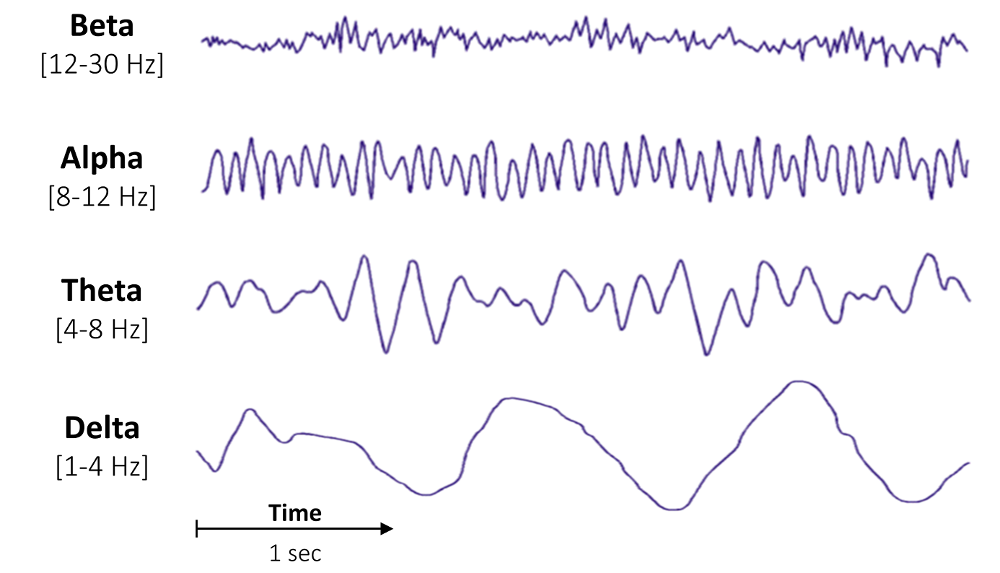

## Alaising Theorem

Aliasing is the effect of new frequencies appearing in the sampled signal after reconstruction, that were not present in the original signal. It is caused by too low sample rate for sampling a particular signal or too high frequencies present in the signal for a particular sample rate. To avoid aliasing, we should comply with the following equation:  

> fs $\geq$ 2fmax

where **fs** is the sampling rate (how many samples of a continuous signal are acquired per second) and **fmax** is the highest frequency in the signal under study. Sample the signal holding on to the above equation will ensure a correct reconstruction of the signal. 

If the equation is to complied with, can observe that the acquired signal will not resemble the original signal and can lead to incorrect conclusions about the signal.

The repeated spectra overlap and in the overlapping regions a permantent loss of signal information happens. That exactly is aliasing.

In the case of EEG, fmax being considered 70 Hz, any fs higher than 140 Hz is valid, to avoid aliasing.

##Objectives
In this work the primary goal is to develop an algorithm that extracts features from an EEG signal, possibly enabling the detection of signs of ADHD. In the second phase of the project it would be interesting to develop a machine learning model that can suggest diagnosis of ADHD according to the feautres of the EEG signal of the patient.  


##State of the art

<font color='red'>search for 

Automatic Detection of ADHD by EEG signal
OR
diagnostic support for ADHD dection 
OR
something like that
</font>




# Materials and Methods
[Table of Contents](#0.2)

## Environment

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.fftpack as fft
from scipy.signal import butter, lfilter, lfilter_zi

plt.rc("font", size=14)

## Materials
The materials used in this project were provided by NeuroImprove clinic in Porto. They consist of 10 EEG text files, 6 of them being EEG signals of patients diagnosed with ADHD, and the remaining 4 are EEG signals of patients without any diagnosed pathology. 

The signal was collected BrainMaster Discovery Hardware with a **sampling frequency of 265 Hz**, and slightly processed with NeuroGuide Software (version 3.1.0). 

In [130]:
# Load Dataframe
eeg = np.loadtxt('Control_7YO_1638C.txt')
eeg = eeg[:,6]      # choose column 7, index starts at 0
eeg.shape

(83456,)

Each EEG file cosists of 19 columns. Each column is data from 1 channel. Each channel represents each electrode that is placed on the scalp of the patient. In this project we decided to choose channel 7 to work with, as this channel's electrode is placed on the center of the head. Other channels are as valid to be used. 

In [131]:
N = len(eeg)
f_s = 265             # sampling frequency (Hz)
T_s = 1 / f_s         # sampling period (s)
t = T_s * N           # length of the data in seconds
t_vec  = np.arange(0, t, T_s) # array of numbers for seconds from 0 to t

Text(0.5, 1.0, 'Raw EEG Signal in Time Domain')

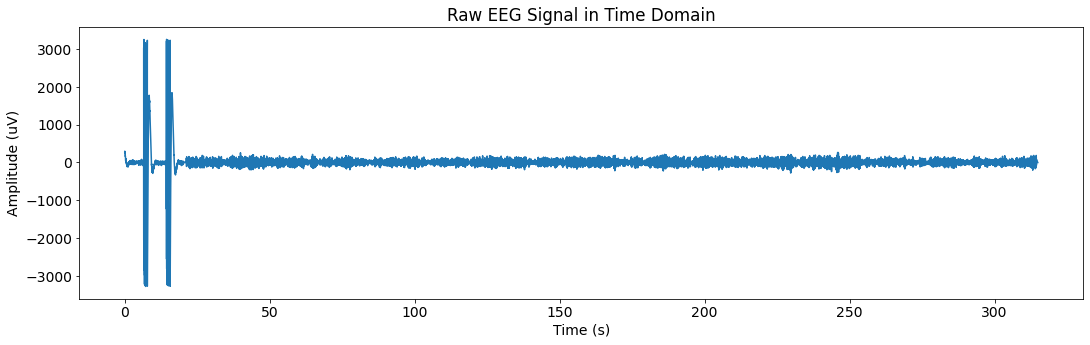

In [132]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(18)
plt.plot(t_vec, eeg)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uV)')
plt.title('Raw EEG Signal in Time Domain')

The figure above shows the raw EEG signal in time domain. This figure does not tell much about the signal, so the signal is going to be converted to frequency domain to be able to analyze. To do so, in the next step **Fast Fourier Transform (FFT)** is applied to the signal. 

In [133]:
def my_fft(eeg):
  eeg_fft = fft.fft(eeg)
  amplitude = np.abs(eeg_fft)
  sample_freq = fft.fftfreq(eeg.size, d = T_s)
  amp_freq = np.array([amplitude, sample_freq])
  return amplitude, sample_freq, eeg_fft

In [134]:
amplitude_eeg, sample_freq_eeg, eeg_fft = my_fft(eeg)

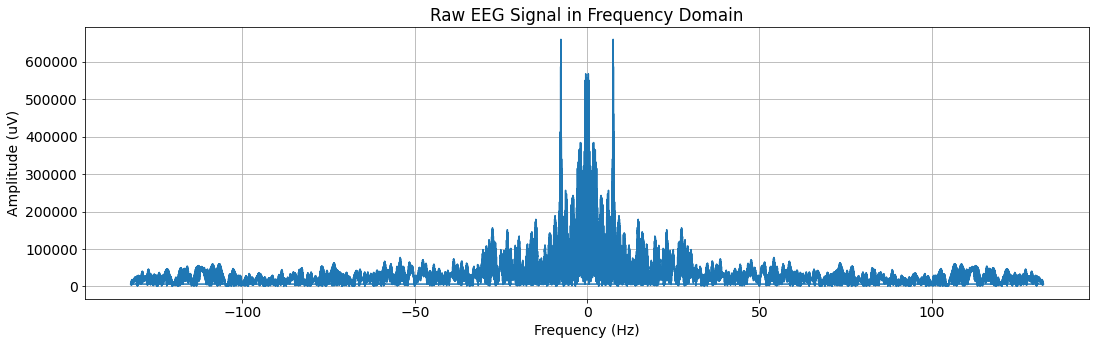

In [135]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(18)
plt.plot(sample_freq_eeg, amplitude_eeg)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (uV)')
plt.title('Raw EEG Signal in Frequency Domain')
plt.grid()

Now that we have the signal in frequency domain, we can clean the signal and apply filters and see the effect in frequency domain. Looking at the generated graph of *Raw EEG Signal in Frequency Domain*, and keeping in mind that in this project the brain waves frequencies under study lie withing the range of 0.5 to 35, it is necessary to remove the unwanted frequencies. This will be done in the next section.   

## EEG Signal Pre-Processing

### Remove Noise
To enable the detection of differences between a control and pathological EEG signal, it is necessary to reduce the noise components such as the powerline noise, baseline shift, muscle activity artefacts, etc. In this section signal pre-processing was done. 

As mentioned in the introduction, brain wave signals lie within 0.5 and 35 Hz (excluding gamma waves), hence, anything outside this interval is considered noise. Filtering the signal, which in this case implies the application of **low-pass filter** to remove frequencies higher than 35 Hz, and **high-pass filter** to remove frequencies less than 0.5 Hz. By limiting the frequencies to this interval, we are confident that the majority of the noise elements are removed, as well as the DC component (0 Hz).


In [136]:
# Ideal filter is applied (threshold) to remove unwanted frequencies
eeg_fft_filtered = eeg_fft.copy()
eeg_fft_filtered[np.abs(sample_freq_eeg) > 35] = 0
eeg_fft_filtered[np.abs(sample_freq_eeg) < 0.5] = 0

amplitude_filtered = np.abs(eeg_fft_filtered)
sample_freq_filtered = fft.fftfreq(eeg_fft_filtered.size, d = T_s)

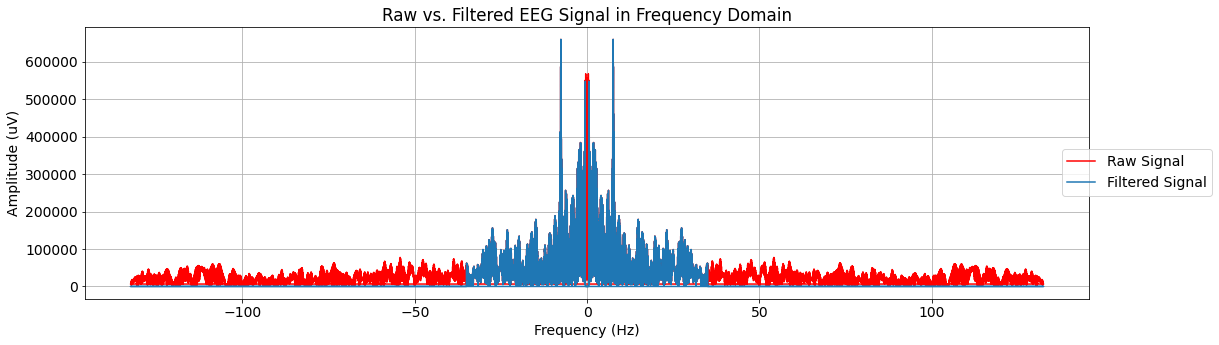

In [137]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(18)
plt.plot(sample_freq_eeg, amplitude_eeg, 'r')
plt.plot(sample_freq_filtered, amplitude_filtered)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (uV)')
plt.title('Raw vs. Filtered EEG Signal in Frequency Domain')
plt.grid()
plt.figlegend(
    labels = ('Raw Signal', 'Filtered Signal'),
    loc = 'center right', 
    frameon = True)

In Figure representing the *Filtered EEG Signal in Frequency Domain*, we can clearly see that the frequencies above 35 Hz and below 0.5 were removed. In the next step the signal will be converted back to the time domain (using the **Inverse Fast Fourier Transform**) to visually evaluate the impact of the filtering on the signal in time domain.  

### Inverse Fast Fourier Transform

In [138]:
eeg_t_clean = fft.ifft(eeg_fft_filtered)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


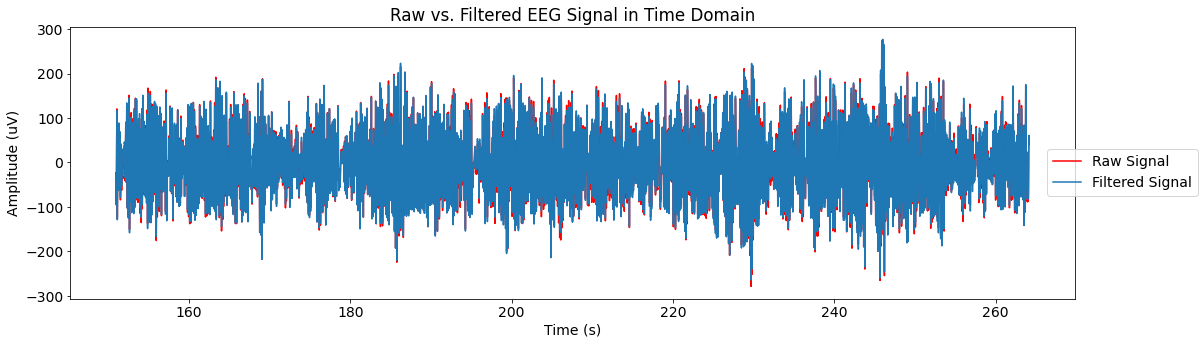

In [139]:
min = 40000
max = 70000
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(18)
plt.plot(t_vec[min:max], eeg[min:max], 'r')
plt.plot(t_vec[min:max], eeg_t_clean[min:max])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uV)')
plt.title('Raw vs. Filtered EEG Signal in Time Domain')
plt.figlegend(
    labels = ('Raw Signal', 'Filtered Signal'),
    loc = 'center right', 
    frameon = True)

## EEG Wavelet Decomposition

As mentioned in the Introduction, EEG signal is composed of the sum of 4 main wavelets (Delta, Theta, Alpha, and Beta). In this section the filtered EEG signal is going to be decomposed to these wavelets for further analysis. This is done by applying **Butterworth bandpass filter of order 3**. It is important to mention that the interval of frequencies for beta wave was slightly shortened, due to its overposition with alpha wave. The overpositioning happens due to transition phase of the filter having a low slope.

In [140]:
# https://scipy-cookbook.readthedocs.io/items/ButterworthBandpass.html

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist_frequency = 0.5 * fs
    low = lowcut / nyquist_frequency
    high = highcut / nyquist_frequency
    b, a = butter(order, [low, high], btype='band')    
    zi = lfilter_zi(b, a) * data[0]
    y, _ = lfilter(b, a, data, zi=zi)
    return y

def plot_bandpass_filter(data, title):
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(10)
    plt.subplot(4,1,1)
    fig.suptitle(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (uV)')
    plt.plot(t_vec[0:len(data)],data)    
    plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


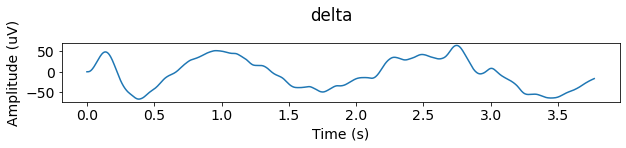

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


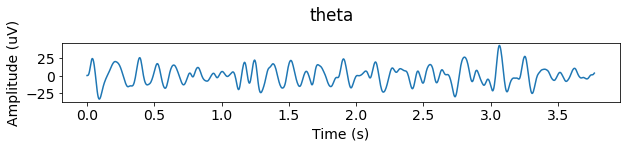

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


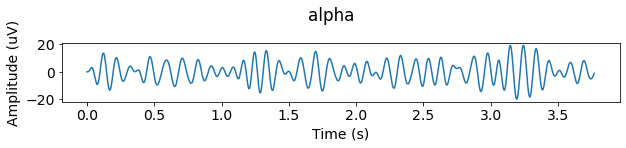

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


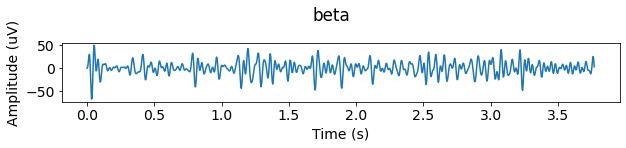

In [141]:
config_bandpass = \
  {
    "delta": [0.5, 4], # 0.5, 4
    "theta": [4, 12], # 4, 8
    "alpha": [8, 12], # 8, 12
    "beta": [12, 35] # 12, 35
  }

df_eeg_decomposed = pd.DataFrame({}) # dataframe to store wavelets

for filter in config_bandpass.keys():
  lowcut = config_bandpass.get(filter)[0]
  highcut = config_bandpass.get(filter)[1]
  bandpass_data = butter_bandpass_filter(eeg_t_clean, lowcut, highcut, fs=f_s, order = 3)
  df_eeg_decomposed[filter] = bandpass_data

  plot_bandpass_filter(bandpass_data[0:1000], filter)

As we can see in the 4 figures generated above, the EEG signal is clearly decomposed. 

<font color='red'>if possible show plot of bandpass butterworth filter itself</font>

In [142]:
amplitude_delta, sample_freq_delta, delta_fft = my_fft(df_eeg_decomposed["delta"].values)
amplitude_theta, sample_freq_theta, theta_fft = my_fft(df_eeg_decomposed["theta"].values)
amplitude_alpha, sample_freq_alpha, alpha_fft = my_fft(df_eeg_decomposed["alpha"].values)
amplitude_beta, sample_freq_beta, beta_fft = my_fft(df_eeg_decomposed["beta"].values)

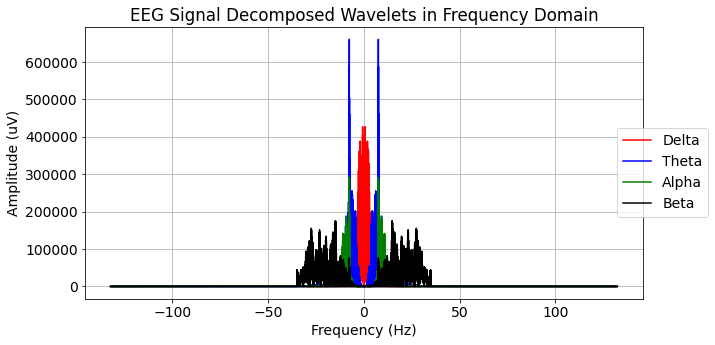

In [143]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)
plt.plot(sample_freq_delta, amplitude_delta, 'r')
plt.plot(sample_freq_theta, amplitude_theta, 'b')
plt.plot(sample_freq_alpha, amplitude_alpha, 'g')
plt.plot(sample_freq_beta, amplitude_beta, 'k')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (uV)')
plt.title('EEG Signal Decomposed Wavelets in Frequency Domain')
plt.grid()
plt.figlegend(
    labels = ('Delta', 'Theta', 'Alpha', 'Beta'),
    loc = 'center right', 
    frameon = True)

The signals in frequency domain also seem propperly decomposed. As mentioned earlier, the overpositioning of Beta wave and Alpha wave is due to the transition phase of the filter not beeing too steep. 

## Feature Extraction

Having the signal preprocessed and decomposed to wavelets, we can now extract some key features from it. So, in this step we extracted the following features from each wavelet of the EEG signal:
- Minimum amplitude
- Maximum amplitude
- Mean amplitude
- Absolute power

Moreover, the absolute power of combination of theta and alpha waves was also obtained. This parameter is important because according to the state of the art, frequencies from 4-12 are the one most affected by ADHD.


In [155]:
#calculation of absolute power for each wavelet
abspowd = np.abs(df_eeg_decomposed["delta"].values)**2
abspowt = np.abs(df_eeg_decomposed["theta"].values)**2
abspowa = np.abs(df_eeg_decomposed["alpha"].values)**2
abspowb = np.abs(df_eeg_decomposed["beta"].values)**2
abspowta = abspowt + abspowa # combination of theta and alpha

# append rows to features DataFrame
row = pd.Series({
    'd_min' : round(amplitude_delta.min(),2), 
    'd_max' : round(amplitude_delta.max(),2), 
    'd_mean' : round(amplitude_delta.mean(),2),
    'd_abs_power': round(abspowd.mean(),2),
    't_min' : round(amplitude_theta.min(),2), 
    't_max' : round(amplitude_theta.max(),2), 
    't_mean' : round(amplitude_theta.mean(),2),
    't_abs_power': round(abspowt.mean(),2),
    'a_min' : round(amplitude_alpha.min(),2), 
    'a_max' : round(amplitude_alpha.max(),2), 
    'a_mean' : round(amplitude_alpha.mean(),2),
    'a_abs_power': round(abspowa.mean(),2),
    'b_min' : round(amplitude_beta.min(),2), 
    'b_max' : round(amplitude_beta.max(),2), 
    'b_mean' : round(amplitude_beta.mean(),2),
    'b_abs_power': round(abspowb.mean(),2),
    'ta_abs_power': round(abspowta.mean(),2),
    },
    name = 'EEG'
)
f = pd.DataFrame({})
f = f.append(row)

In [156]:
f

,d_min,d_max,d_mean,d_abs_power,t_min,t_max,t_mean,t_abs_power,a_min,a_max,a_mean,a_abs_power,b_min,b_max,b_mean,b_abs_power,ta_abs_power
1st EEG,0.23,126948.21,856.63,369.34,0.02,45453.76,840.19,127.99,0.02,27398.36,370.59,41.17,0.12,23964.69,736.22,54.14,169.15


The table above shows all the features that were extracted from the EEG signal under study. The naming of the columns means:
- d_min: minimum amplitude of delta wavelet
- d_max: maximum amplitude of delta wavelet
- d_mean: mean amplitude of delta wavelet 
- d_abs_power: absolute power of delta wavelet
- t_min: minimum amplitude of theta wavelet
- ...
- ta_abs_power: absolute power of theta and alpha wavelet combined
and so on. 

### Automization 

Next, a for loop is created with all the code explained so far, to process EEG files and extract the mentioned features. As mentioned in the beggining of the Materials and Methods section, in this project we have access to 10 EEG files. All 10 are processed next and added to a dataframe. Moreover, an extra column was added to the dataframe called "ADHD". This column contains a binary variable for the diagnosis of the EEG, 0 being a control EEG and 1 being an EEG with diagnosed ADHD.   

In [169]:
# Create dataframe for features
df_features = pd.DataFrame()

# append columns to DataFrame

# delta features
df_features['d_min'] = []
df_features['d_max'] = []
df_features['d_mean'] = []
df_features['d_abs_power'] = []
# theta features
df_features['t_min'] = []
df_features['t_max'] = []
df_features['t_mean'] = []
df_features['t_abs_power'] = []
# alpha features
df_features['a_min'] = []
df_features['a_max'] = []
df_features['a_mean'] = []
df_features['a_abs_power'] = []
# beta features
df_features['b_min'] = []
df_features['b_max'] = []
df_features['b_mean'] = []
df_features['b_abs_power'] = []
  

In [170]:
# names of all EEG files
file_names = ['Control_6YO_1827C.txt', 
              'Control_7YO_1638C.txt',
              'Control_6YO_1852C.txt',
              'Control_7YO_1813C.txt',
              'ADHD_6YO_1465C.txt',
              'ADHD_6YO_1573C.txt',
              'ADHD_8YO_1807C.txt',
              'ADHD_9YO_1843C.txt',
              'ADHD_7YO_846C.txt',
              'ADHD_6YO_1788C.txt'
              ]

In [171]:
# Do the same procedure for all the list of EEG files (filenames) 

for file_name in file_names:
  # ---- Load Dataframe ---- 
  eeg = np.loadtxt(file_name)
  eeg = eeg[:,6]      # choose column 7, index starts at 0

  # ---- Defining fft parameters ---- 
  N = len(eeg)
  f_s = 265             # sampling frequency (Hz)
  T_s = 1 / f_s         # sampling period (s)
  t = T_s * N           # length of the data in seconds
  t_vec  = np.arange(0, t, T_s) # array of numbers for seconds from 0 to t

  # ---- FFT ---- 
  amplitude_eeg, sample_freq_eeg, eeg_fft = my_fft(eeg)

  # ---- Pre-processing ---- 
  # Ideal filter is applied (threshold) to remove unwanted frequencies
  eeg_fft_filtered = eeg_fft.copy()
  eeg_fft_filtered[np.abs(sample_freq_eeg) > 35] = 0
  eeg_fft_filtered[np.abs(sample_freq_eeg) < 0.5] = 0

  amplitude_filtered = np.abs(eeg_fft_filtered)
  sample_freq_filtered = fft.fftfreq(eeg_fft_filtered.size, d = T_s)

  eeg_t_clean = fft.ifft(eeg_fft_filtered)

  # ---- Wavelet decomposition
  df_eeg_decomposed = pd.DataFrame({}) # dataframe to store wavelets

  for filter in config_bandpass.keys():
    lowcut = config_bandpass.get(filter)[0]
    highcut = config_bandpass.get(filter)[1]
    bandpass_data = butter_bandpass_filter(eeg_t_clean, lowcut, highcut, fs=f_s, order = 3)
    df_eeg_decomposed[filter] = bandpass_data

  amplitude_delta, sample_freq_delta, delta_fft = my_fft(df_eeg_decomposed["delta"].values)
  amplitude_theta, sample_freq_theta, theta_fft = my_fft(df_eeg_decomposed["theta"].values)
  amplitude_alpha, sample_freq_alpha, alpha_fft = my_fft(df_eeg_decomposed["alpha"].values)
  amplitude_beta, sample_freq_beta, beta_fft = my_fft(df_eeg_decomposed["beta"].values)

  # ---- Adding features to features dataframe
  #calculation of absolute power for each wavelet
  abspowd = np.abs(df_eeg_decomposed["delta"].values)**2
  abspowt = np.abs(df_eeg_decomposed["theta"].values)**2
  abspowa = np.abs(df_eeg_decomposed["alpha"].values)**2
  abspowb = np.abs(df_eeg_decomposed["beta"].values)**2
  abspowta = abspowt + abspowa # combination of theta and alpha

  # append rows to features DataFrame
  row = pd.Series({
      'd_min' : round(amplitude_delta.min(),2), 
      'd_max' : round(amplitude_delta.max(),2), 
      'd_mean' : round(amplitude_delta.mean(),2),
      'd_abs_power': round(abspowd.mean(),2),
      't_min' : round(amplitude_theta.min(),2), 
      't_max' : round(amplitude_theta.max(),2), 
      't_mean' : round(amplitude_theta.mean(),2),
      't_abs_power': round(abspowt.mean(),2),
      'a_min' : round(amplitude_alpha.min(),2), 
      'a_max' : round(amplitude_alpha.max(),2), 
      'a_mean' : round(amplitude_alpha.mean(),2),
      'a_abs_power': round(abspowa.mean(),2),
      'b_min' : round(amplitude_beta.min(),2), 
      'b_max' : round(amplitude_beta.max(),2), 
      'b_mean' : round(amplitude_beta.mean(),2),
      'b_abs_power': round(abspowb.mean(),2),
      'ta_abs_power': round(abspowta.mean(),2),
      },
      name = file_name
  )
  df_features = df_features.append(row)

df_features["ADHD"] = [0,0,0,0,1,1,1,1,1,1]

## ADHD Prediction Model 

For this classification task we decided to use Naive Bayes technique, due to its simplicity and the the fact that it does not have any hyperparameters, hence we do not have the hyperparameter tuning step.

To train the model, only the last two rows of the feature dataframe were used:
- absolute power of theta + alpha (because it is the most relevant parameter)
- binary ADHD variable: 0 means that the EEG is from control person (doesn not have ADHD), and 1 means the EEG is from a person with ADHD.

The extracted features are divided into test set (80%) and training set (20%). Training set will be used to train the predictive model, and test set will be used to assess its accuracy. 

In [215]:
# split data into X and y and then into training and testing sets

from sklearn.model_selection import train_test_split

X = df_features['ta_abs_power']
y = df_features['ADHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape

((8,), (2,))

In [217]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

nb_model = GaussianNB()
nb_model.fit(X_train.values.reshape(-1, 1), y_train)
y_pred = nb_model.predict(X_test.values.reshape(-1, 1))

# Results and Discussion

The features that were extracted from all the EEG signal available to study are presented in the table below:

In [172]:
df_features

,d_min,d_max,d_mean,d_abs_power,t_min,t_max,t_mean,t_abs_power,a_min,a_max,a_mean,a_abs_power,b_min,b_max,b_mean,b_abs_power,ta_abs_power,ADHD
Control_6YO_1827C.txt,0.04,191927.38,1161.47,458.52,0.31,49870.57,885.40,94.35,0.01,26225.11,343.22,23.14,0.03,15189.92,725.85,25.30,117.49,0
Control_7YO_1638C.txt,0.15,95917.81,640.19,207.82,0.93,27291.77,539.68,52.59,0.15,15833.69,218.53,14.35,0.19,10357.59,574.98,26.01,66.95,0
Control_6YO_1852C.txt,0.05,71363.69,605.74,164.45,0.04,33167.96,620.38,75.53,0.01,21545.01,257.61,21.40,0.23,10580.60,457.80,16.08,96.93,0
Control_7YO_1813C.txt,0.03,162966.53,1060.74,613.44,0.18,54524.16,714.34,97.33,0.08,21261.98,257.61,18.65,0.00,9950.02,535.37,20.54,115.98,0
ADHD_6YO_1465C.txt,0.09,114703.77,717.63,256.86,0.44,53976.99,809.62,152.99,0.04,39261.34,339.52,40.97,0.29,13367.99,578.93,26.72,193.96,1
ADHD_6YO_1573C.txt,0.12,159095.24,1131.78,551.59,0.06,55569.47,1073.41,226.90,0.02,35609.69,407.30,50.43,0.36,15013.08,745.02,41.13,277.33,1
ADHD_8YO_1807C.txt,0.27,75271.42,555.59,159.75,0.03,25751.57,538.74,64.53,0.02,18994.66,208.57,14.91,0.12,8756.72,435.09,16.59,79.45,1
ADHD_9YO_1843C.txt,0.95,76207.17,615.07,166.66,0.00,44059.05,733.81,117.81,0.01,25030.73,301.58,28.53,0.02,13382.56,627.46,31.84,146.35,1
ADHD_7YO_846C.txt,0.09,83515.65,729.50,204.19,0.02,46475.41,806.08,128.89,0.03,30846.83,302.30,28.90,0.07,11764.39,532.23,20.31,157.80,1
ADHD_6YO_1788C.txt,0.23,126948.21,856.63,369.34,0.02,45453.76,840.19,127.99,0.02,27398.36,370.59,41.17,0.12,23964.69,736.22,54.14,169.15,1


It is evident that there is an evident difference between ADHD and control cases in the sum of theta and alpha wavelet absolute power (ta_abs_power). Moreover, the statistical analysis of this column both for ADHD and control cases is presented below:


In [226]:
print("statistical analysis of theta + alpha wavelet absolute power of CONTROL group:")
df_features[df_features['ADHD'] == 0]['ta_abs_power'].describe()

statistical analysis of theta + alpha wavelet absolute power of CONTROL group


count      4.000000
mean      99.337500
std       23.531768
min       66.950000
25%       89.435000
50%      106.455000
75%      116.357500
max      117.490000
Name: ta_abs_power, dtype: float64

In [227]:
print("statistical analysis of theta + alpha wavelet absolute power of ADHD group:")
df_features[df_features['ADHD'] == 1]['ta_abs_power'].describe()

statistical analysis of theta + alpha wavelet absolute power of ADHD group:


count      6.000000
mean     170.673333
std       64.806292
min       79.450000
25%      149.212500
50%      163.475000
75%      187.757500
max      277.330000
Name: ta_abs_power, dtype: float64

According to these results it is evident that on average, the absolute power of sum of theta and alpha wave is indeed higher in cases with ADHD. Moreover, looking closer to the table in the beginning of this section, as expected, we can see that there are outliers. For example, case *ADHD_8YO_1807C* has a much lower ta_asb_pow than the other ADHD cases. This can be due to this case not being the same type of ADHD as the other samples. 

Regarding the predictive model, the results of the model are demonstrated below. As we can see in the table below, the evaluation results show that the model works with an accuracy of 100%. Also, the heatmap of the confusion matrix is also presented, where we can conclude that the model has successfully predicted all of the cases, being ADHD or normal.

In [228]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



Text(29.0, 0.5, 'Truth')

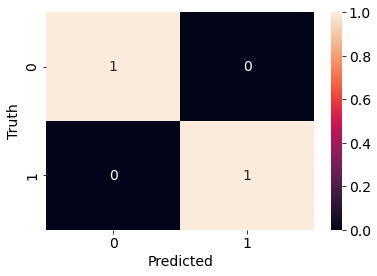

In [229]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#Conclusions and Future Works

In summary, this work was focused on extracting features form an EEG signal. 10 EEG signals were evaluated, 4 of with were control samples, and 6 were ADHD samples.

Signal was pre-processed to remove any external noise using an ideal filter applied in frequency domain. Brain signal was decomposed to its wavelets using 3rd order butterworth bandpass filter. Several features such as minimum, maximum and mean amplitude of the signals were extracted as well as the absolute power. A difference in the combined absolute power of theta and alpha was detected between control and ADHD signals. On average, patients with ADHD tend to have a higher absolute power in theta and alpha wavelets, as expected. It would be interesting to find more key features that can be used to detect ADHD. 

Using the most relevant feature (combined absolute power of theta and alpha) a machine learning model was designed with Naive Bayes method, using 8 classified EEG signals. The model has an accuracy of 100%.

The designed model could be used as clinical diagnosis of ADHD. The accuracy of 100% mighr be misleading, because the model was trained and tested with very small dateset. To develop a more reliable model it would be necessary to train this model with a bigger dataset, and possibly test other machine learning techniques. Moreover, a bigger dataset will probably imply an unbalanced dataset, due to ADHD being only diagnosed in about 2% of the population.   

# References



*   https://www.cdc.gov/ncbddd/adhd/facts.html
*   https://worldpopulationreview.com/country-rankings/adhd-rates-by-country
*   https://nhahealth.com/can-eeg-diagnose-adhd/
*   https://www.ncbi.nlm.nih.gov/books/NBK539805/
*   https://thewolfsound.com/what-is-aliasing-what-causes-it-how-to-avoid-it/
*   https://xiengineering.com/sampling-frequency-audio-aliasing/   
*   http://stresstherapysolutions.com/uploads/STSCheatSheetoftheBrain.pdf
*   https://www.researchgate.net/publication/236602395_Prediction_of_Treatment_Response_and_the_Effect_of_Independent_Component_Neurofeedback_in_Obsessive-Compulsive_Disorder_A_Randomized_Sham-Controlled_Double-Blind_Study